# TSPPP Tutorial

This tutorial shows how to instantiate a TSPPP instance and solve it using PRM and TSPDiffuser.

### Create problem instance

Let's start by creating a problem instance. We will use the `tsppp.data.map_creator.MapCreator` class from the `tsppp` module to create an obstacle map with random blobs.
A set of destinations can be randomly generated using the `tsppp.data.utils.sample_points` method.


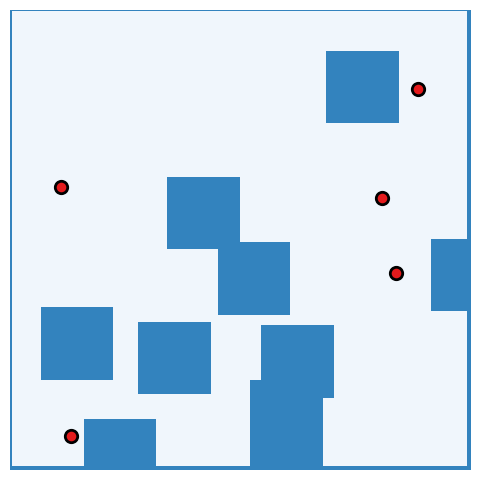

In [4]:
from tsppp.data.map_creator import MapCreator
from tsppp.data.utils import sample_points
from tsppp.viz import visualize

map_creator = MapCreator(num_blobs=10, blob_size=20, map_size=128)
occupancy_map = map_creator.create(seed=0)
destinations = sample_points(occupancy_map, N=5, seed=0)
visualize(occupancy_map, destinations)

### Solving the problem 

Solver class is implemented in `tsppp.planners.tsp_solver.TSPSolver`. The class accepts `graph_type` as an argument to specify how the roadmap is constructed.



TSP status (random_3000_r): True, total_time: 4.59e+00 (graph: 4.50e+00, cost: 8.65e-02, tsp: 2.08e-03)
Path status: True, length: 343.65


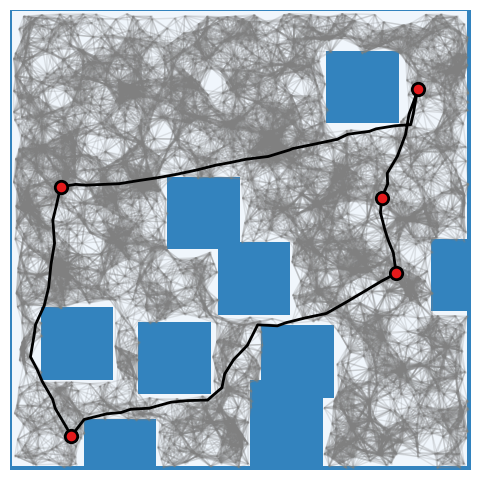

In [6]:
from tsppp.planners.tsp_solver import TSPSolver

# PRM 
solver = TSPSolver(graph_type="random_3000_r")
result = solver.solve(occupancy_map, destinations)
path = solver.execute(result)
print(result)
print(path)
visualize(occupancy_map, destinations, path, graph=solver.graph)

Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.03it/s]


TSP status (tspdiffuser_10_5): True, total_time: 9.89e-01 (graph: 9.67e-01, cost: 2.10e-02, tsp: 1.11e-03)
Path status: True, length: 345.61


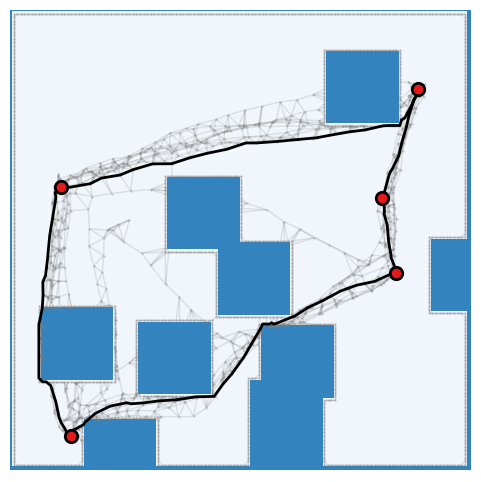

In [8]:
# TSPDiffuser
solver = TSPSolver(
    graph_type="tspdiffuser_10_5",
    checkpoint="../checkpoints/ddpm/",
)
result = solver.solve(occupancy_map, destinations)
path = solver.execute(result)
print(result)
print(path)

visualize(occupancy_map, destinations, path, graph=solver.graph)